# Monte Carlo Methods

Monte Carlo methods are a class of computational algorithms that use randomness to solve problems that might be deterministic in nature. These methods are particularly useful for numerical integration, optimization, and probabilistic simulations.

**Estimating Pi using Monte Carlo**

In [ ]:
import numpy as np

N = 10000  # Number of points
x, y = np.random.uniform(-1, 1, N), np.random.uniform(-1, 1, N)
inside_circle = (x**2 + y**2) <= 1  # Condition for inside circle

print(f"Number of points inside the circle: {np.sum(inside_circle)}")
pi_estimate = (np.sum(inside_circle) / N) * 4  # Area ratio
print(f"Estimated π: {pi_estimate}")


Number of points inside the circle: 7869
Estimated π: 3.1476


# Key Concepts

To grasp Monte Carlo methods, you need to understand these foundational ideas

1. Random Sampling
2. Law of Large Numbers
3. Central Limit Theorem

## Random Sampling

Monte Carlo relies on random numbers to approximate solutions. The idea is to sample from a probability distribution and use those samples to compute estimates.

* **Uniform Sampling:** Generating numbers that are evenly distributed over an interval [a,b].

* **Non-Uniform Sampling:** Generating numbers from a specific probability distribution (e.g., Gaussian, Exponential).

Random number generation is at the heart of Monte Carlo methods.

Let's break down different techniques for generating random numbers and how to use them effectively.

**Example:** Generating uniform random numbers in Python

In [ ]:
import numpy as np

samples = np.random.uniform(0, 1, 10)  # 10 random numbers between 0 and 1
print(samples)

[0.04977487 0.57997062 0.06225729 0.02528978 0.58621915 0.46719583
 0.64273675 0.32713955 0.5838837  0.39824633]


In [ ]:
samples = np.random.uniform(0, 1, 10)  # 10 random numbers between 0 and 1
print(samples)

[0.84487531 0.02327194 0.81446848 0.28185477 0.11816483 0.69673717
 0.62894285 0.87747201 0.73507104 0.80348093]


A seed makes random numbers deterministic.

Always the same output when the seed is set

In [ ]:
import numpy as np

np.random.seed(42)  # Fix the seed for reproducibility
uniform_samples = np.random.uniform(0, 1, 10)  # 10 numbers between 0 and 1
print(uniform_samples)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]


In [ ]:
np.random.seed(42)  # Fix the seed for reproducibility
uniform_samples = np.random.uniform(0, 1, 10)  # 10 numbers between 0 and 1
print(uniform_samples)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]


Generating Random Numbers from **Common Distributions**

In [ ]:
# Normal (Gaussian) Distribution
normal_samples = np.random.normal(loc=0, scale=1, size=10)
print(normal_samples)

[-1.9110416   0.66799495  0.32001561 -1.075018   -0.73929015  1.72502533
  1.62849179 -0.22621105 -1.23222774  1.2929122 ]


In [ ]:
# Exponential Distribution
exponential_samples = np.random.exponential(scale=2, size=10)
print(exponential_samples)

[1.87066604 0.3739225  0.13452786 5.94737559 6.74126068 3.30466315
 0.72657572 0.20555463 2.30550153 1.16018169]


In [ ]:
# Binomial Distribution
binomial_samples = np.random.binomial(n=10, p=0.5, size=10)
print(binomial_samples)

[4 3 7 6 4 3 4 4 6 6]


In [ ]:
# Poisson Distribution
poisson_samples = np.random.poisson(lam=3, size=10)
print(poisson_samples)

[2 3 4 4 1 2 3 2 3 4]


## Law of Large Numbers (LLN)

The Law of Large Numbers states that as the number of trials increases, the sample mean converges to the expected value.

In [ ]:
# Estimating the Expected Value of a Die Roll
num_trials = 10000
samples = np.random.randint(1, 7, num_trials)  # Simulating a fair 6-sided die
estimated_mean = np.mean(samples)

print("Estimated Mean:", estimated_mean)  # Should be close to 3.5

Estimated Mean: 3.4989


## Central Limit Theorem (CLT)

The Central Limit Theorem (CLT) states that the distribution of the sample mean of a large number of independent and identically distributed (i.i.d.) random variables approaches a normal (Gaussian) distribution, regardless of the original distribution of the data.

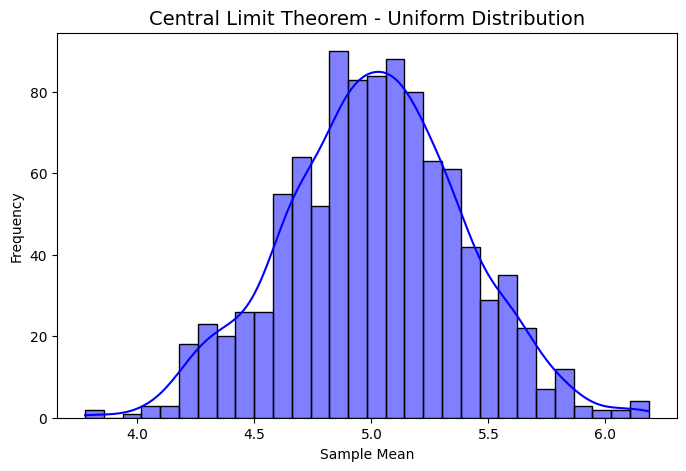

In [ ]:
# Example: Summing Random Variables

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_samples = 1000  # Number of sample means to compute
sample_size = 50    # Number of values in each sample

means = [np.mean(np.random.uniform(0, 10, sample_size)) for _ in range(num_samples)]

# Plot histogram of sample means
plt.figure(figsize=(8, 5))
sns.histplot(means, bins=30, kde=True, color="blue")
plt.title("Central Limit Theorem - Uniform Distribution", fontsize=14)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

# Monte Carlo Sampling

Monte Carlo Sampling involves:
1. Generating random samples from a probability distribution.
2. Using these samples to estimate numerical quantities.
3. Converging to the expected value as the number of samples increases.

## Types of Random Number Generators (RNGs)

###1. True Random Number Generators (TRNGs)

  * These generators produce numbers based on unpredictable physical phenomena.
  * Non-deterministic (truly random).
  * Examples include radioactive decay, thermal noise, and atmospheric noise.
  * Using External Source like Random.org (uses atmospheric noise to generate randomness)

In [ ]:
import requests

response = requests.get("https://www.random.org/integers/?num=5&min=1&max=100&col=1&base=10&format=plain&rnd=new")
print(response.text)  # Fetches true random numbers from Random.org

79
54
88
75
43



###2. Pseudo-Random Number Generators (PRNGs)

  * PRNGs use mathematical algorithms to generate sequences that appear random.
  * Not truly random (can be predicted if the algorithm is known).
  * These are deterministic (the same seed produces the same sequence).
  * Used in simulations, machine learning, and gaming.

**Common PRNG Algorithms:**
  1. Linear Congruential Generator (LCG)

  2. Mersenne Twister (MT19937)
    * Default PRNG in NumPy and Python’s `random` module.
    * Used in Monte Carlo simulations and statistical applications.
  3. PCG (Permuted Congruential Generator)
    * Modern alternative to Mersenne Twister. Used in Python 3.8+ for better statistical properties.

In [ ]:
def lcg(seed, a=1664525, c=1013904223, m=2**32):
    return (a * seed + c) % m

seed = 42
print(lcg(seed))  # Generates a pseudo-random number

1083814273


In [ ]:
# Python Example (Mersenne Twister):
import numpy as np

np.random.seed(42)  # Fixed seed for reproducibility
print(np.random.rand(5))  # Generate 5 pseudo-random numbers

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


In [ ]:
# Example using PCG in Python:
from numpy.random import Generator, PCG64

rng = Generator(PCG64())
print(rng.random(5))  # Generate 5 pseudo-random numbers

[0.66881972 0.69576622 0.2921537  0.43908263 0.26945083]


###3. Quasi-Random Number Generators (QRNGs)

  * QRNGs generate low-discrepancy sequences that cover space more uniformly than PRNGs.
  * Not truly random (they follow deterministic patterns).
  * Useful for high-dimensional numerical integration.
  * Used in Quasi-Monte Carlo (QMC) simulations for better convergence.

**Common QRNG Sequences:**

1. Halton Sequence: Used in multidimensional sampling.

2. Sobol Sequence: Often used in Monte Carlo methods.
3. Faure Sequence: A generalization of Halton.

In [ ]:
from scipy.stats.qmc import Halton, Sobol

sampler = Halton(d=2, scramble=False)
halton_samples = sampler.random(n=5)  # Generate 5 quasi-random points
print(halton_samples)

sampler = Sobol(d=2, scramble=True)
sobol_samples = sampler.random(n=5)  # Generate 5 quasi-random points
print(sobol_samples)

[[0.         0.        ]
 [0.5        0.33333333]
 [0.25       0.66666667]
 [0.75       0.11111111]
 [0.125      0.44444444]]
[[0.81064187 0.3907444 ]
 [0.40020481 0.54897498]
 [0.22696431 0.23615616]
 [0.57787693 0.83195437]
 [0.6953708  0.07721544]]


## Sampling Techniques

Monte Carlo methods rely on random sampling to approximate solutions to complex problems, such as integrals, expected values, or system simulations.

The choice of sampling technique significantly impacts the accuracy and efficiency of these methods.

###1. Simple Random Sampling

Each sample is drawn independently and uniformly from the probability space.

How It Works: For an interval [a,b], generate random numbers xi such that each has an equal probability of falling anywhere in [a,b].

In Python, this is done with `random.uniform(a, b)`

In [ ]:
# Example: Estimating an Integral
# Estimate I = ∫​x^2 dx, which has an analytical solution 1/3

num_samples = 100000
x = np.random.uniform(0, 1, num_samples)
estimate = np.mean(x**2)

print("Ramdom Sampling Estimate:", estimate)  # Should be close to 1/3

Ramdom Sampling Estimate: 0.33371095965332376


###2. Importance Sampling

Instead of sampling uniformly, samples are drawn from a distribution (non-uniform distribution) that emphasizes regions of the domain where the function has a larger impact on the result.

In [ ]:
# Example:  Estimating an Integral
# I = ∫e^−x/(1+x^2) dx
# we sample from e^−x (an exponential distribution).

num_samples = 100000
x = np.random.exponential(1, num_samples)  # Sampling from p(x) = e^(-x)
w = np.exp(x) * (np.exp(-x) / (1 + x**2))  # Importance weight

integral_estimate = np.mean(w)
print(f"Importance Sampling Estimate: {integral_estimate}")


###3. Stratified Sampling

The domain is divided into smaller subregions (strata), and uniform sampling is performed within each stratum to ensure even coverage.

How It Works: Split [a,b] into k subintervals, sample n_k  points from each, and compute a weighted average based on the subinterval sizes.

Example: For ∫x^2 dx, divide [0,1] into [0,0.5] and [0.5,1], sample equally from each, and combine results.



In [ ]:
num_strata = 10
num_samples_per_stratum = 1000
total_samples = num_strata * num_samples_per_stratum

samples = np.array([(i + np.random.rand(num_samples_per_stratum)) / num_strata for i in range(num_strata)]).flatten()
estimate = np.mean(samples**2)

print(f"Stratified Sampling Estimate: {estimate:.6f}, Exact Value: {1/3:.6f}")

Stratified Sampling Estimate: 0.333199, Exact Value: 0.333333


## Simulating Random Variables

Simulating random variables is a foundational step in Monte Carlo simulations, as it allows you to model uncertainty and generate the random inputs needed for sampling-based approximations or system simulations.

**Random Variable**

A random variable is a variable that takes on different values based on the outcome of a random process.

Each random variable follows a probability distribution that dictates how likely each outcome is.

<table>
  <tr>
    <th>Distribution</th>
    <th>Use Case</th>
    <th>Python Function</th>
  </tr>
  <tr>
    <td>Uniform</td>
    <td>Random Sampling, Basis for Other Methods</td>
    <td>np.random.rand()</td>
  </tr>
  <tr>
    <td>Bernoulli</td>
    <td>Single Success/Failure Trial</td>
    <td>np.random.binomial(1, p)</td>
  </tr>
  <tr>
    <td>Binomial</td>
    <td>Number of Successes in n Trials</td>
    <td>np.random.binomial(n, p)</td>
  </tr>
  <tr>
    <td>Poisson</td>
    <td>Rare Events (e.g., Customer Arrivals)</td>
    <td>np.random.poisson(lambda_)</td>
  </tr>
  <tr>
    <td>Normal (Gaussian)</td>
    <td>Many Natural Phenomena (e.g., Heights, Errors)</td>
    <td>np.random.normal(mu, sigma)</td>
  </tr>
  <tr>
    <td>Exponential</td>
    <td>Waiting Time Between Events</td>
    <td>np.random.exponential(1/lambda_)</td>
  </tr>
  <tr>
    <td>Custom PDF</td>
    <td>Arbitrary Distributions</td>
    <td>Inverse Transform, Rejection Sampling</td>
  </tr>
</table>


In [ ]:
# Bernoulli Distribution (Coin Toss)
# A Bernoulli variable takes values 1 (success) with probability p and 0 (failure) with probability 1−p.

import numpy as np
p = 0.7  # Probability of success
bernoulli_rvs = np.random.binomial(1, p, 10)
print("Bernoulli RVs:", bernoulli_rvs)

Bernoulli RVs: [1 1 0 1 0 1 1 1 0 1]


### Inverse-Transform Method

If we want to generate random numbers from any arbitrary distribution, we can use the Inverse Transform Method:

**How It Works?**

Given a continuous random variable X with cumulative distribution function (CDF) F(x), we generate samples as follows:

    Generate a uniform random number U~(0,1).

    Compute X = F^−1(U), where F^-1  is the inverse of the CDF.

Since U is uniformly distributed, the transformation ensures that X follows the desired distribution.

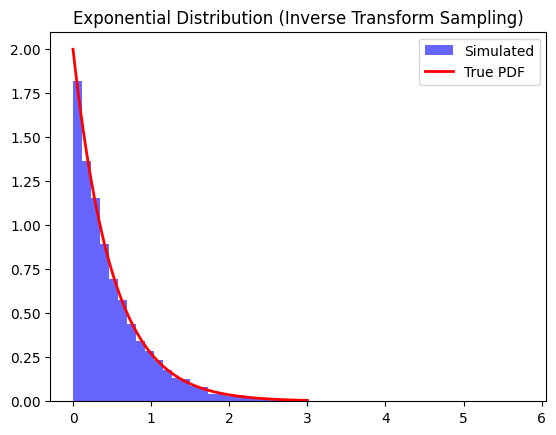

In [ ]:
# Example: Generating an Exponential Distribution

# Exponential CDF : F(x) = U = 1−e^(−λx) ,x≥0
# To find F^-1 , solve for x:
# x = −ln(1−U) / λ​

import numpy as np
import matplotlib.pyplot as plt

def inverse_transform_exponential(lambda_, num_samples=10000):
    U = np.random.rand(num_samples)  # Step 1: Generate U ~ Uniform(0,1)
    X = -np.log(1 - U) / lambda_  # Step 2: Apply inverse transform
    return X

# Generate and plot samples
lambda_ = 2
samples = inverse_transform_exponential(lambda_)

plt.hist(samples, bins=50, density=True, alpha=0.6, color='b', label="Simulated")
x = np.linspace(0, 3, 100)
plt.plot(x, lambda_ * np.exp(-lambda_ * x), 'r-', lw=2, label="True PDF")
plt.legend()
plt.title("Exponential Distribution (Inverse Transform Sampling)")
plt.show()

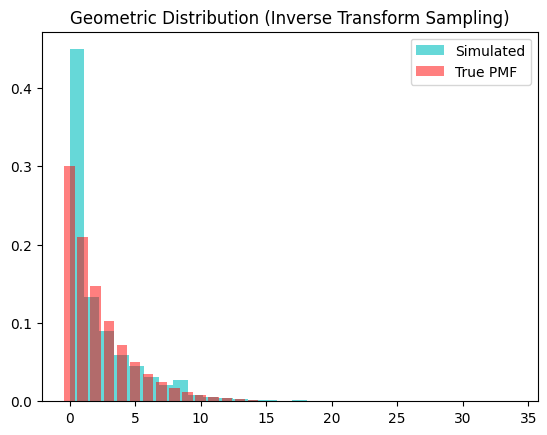

In [ ]:
# Example: Generating a Discrete Geometric Distribution A Geometric Distribution models the number of Bernoulli trials before the first success.
# F(k) = U = 1−(1−p)^k
# solve for k

def inverse_transform_geometric(p, num_samples=10000):
    U = np.random.rand(num_samples)  # Step 1: Generate U ~ Uniform(0,1)
    X = np.floor(np.log(1 - U) / np.log(1 - p))  # Step 2: Apply inverse transform
    return X

p = 0.3
samples = inverse_transform_geometric(p)

plt.hist(samples, bins=30, density=True, alpha=0.6, color='c', label="Simulated")
x = np.arange(0, 15)
plt.bar(x, (1 - p) ** x * p, color='r', alpha=0.5, label="True PMF")
plt.legend()
plt.title("Geometric Distribution (Inverse Transform Sampling)")
plt.show()


Advantages of the Inverse-Transform Method

✔ Easy to implement for distributions with an explicit inverse CDF.

✔ Works for both discrete and continuous distributions.

✔ Only requires uniform random numbers.

### Box–Muller Transform

a random number sampling method for generating pairs of independent, standard, normally distributed (zero expectation, unit variance) random numbers.

***Standard Normal Distribution - Generating Normally Distributed Random Variables***

many applications require Gaussian (Normal) random variables, but most programming languages only provide uniform random number generators.


**The Box–Muller Formula**

If U1, U2 are independent random variables from the Uniform(0,1) distribution, then the Box–Muller Transform produces two independent standard normal random variables Z0, Z1 using polar coordinates R, Θ.

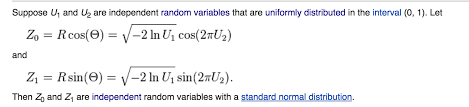

By transforming uniform random variables into a normal distribution, the method provides a mathematically sound way to generate Gaussian-distributed numbers.

* Simple, generates two numbers at a time
* It is useful for generating Gaussian noise efficiently.
* Uses trigonometric functions (slightly slow)

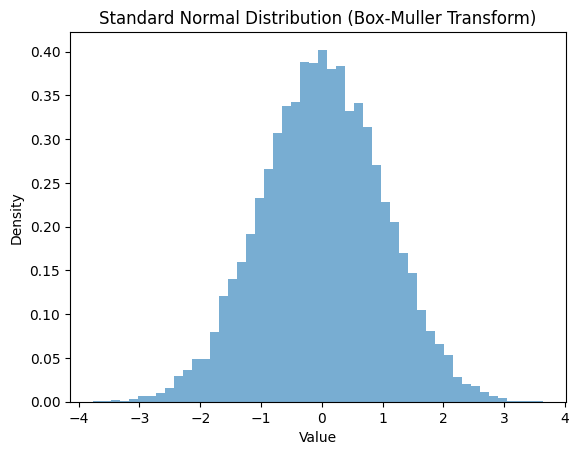

In [ ]:
# Normal Random Variable Simulation: Box–Muller Approach

import numpy as np
import matplotlib.pyplot as plt

def box_muller_transform(n):
    U1 = np.random.rand(n)  # Uniform(0,1) random numbers
    U2 = np.random.rand(n)  # Uniform(0,1) random numbers

    Z0 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z1 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)

    return Z0, Z1

# Generate 10,000 standard normal samples
Z0, Z1 = box_muller_transform(5000)

# Combine both sets of generated values
samples = np.concatenate((Z0, Z1))

# Plot histogram
plt.hist(samples, bins=50, density=True, alpha=0.6)
plt.title("Standard Normal Distribution (Box-Muller Transform)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

### Rejection Sampling

 used to generate samples from complex probability distributions when the Inverse-Transform Method is impractical (i.e., when the inverse CDF is hard to compute).

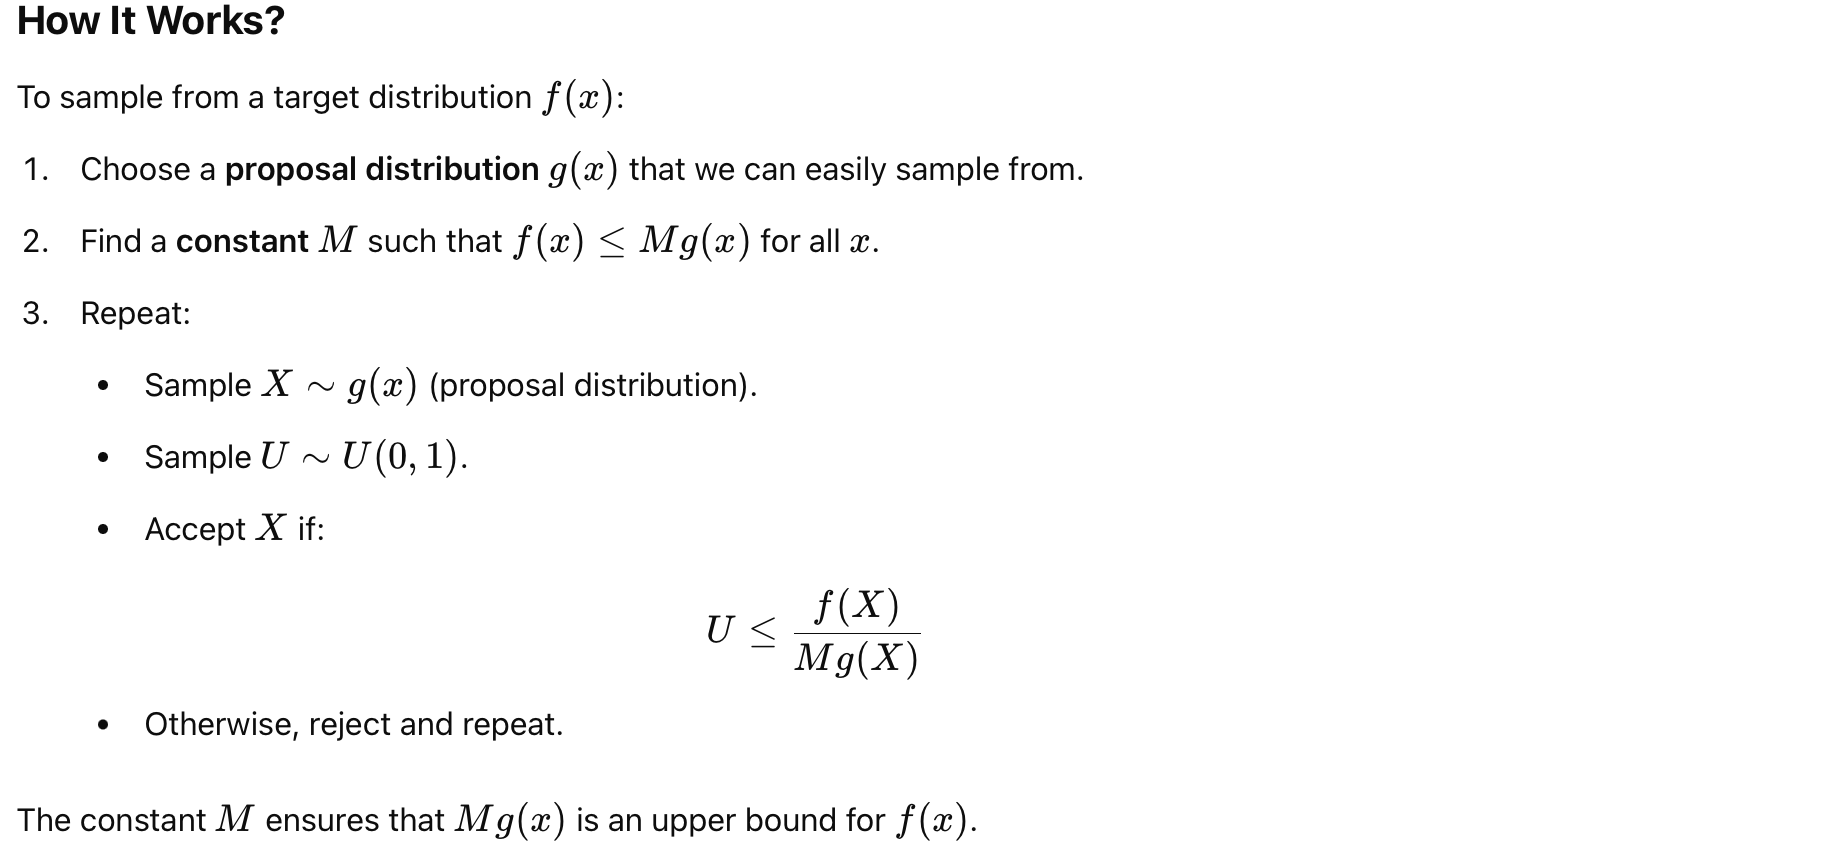

**Example: Sampling from a Normal Distribution Using Uniform Proposal**

We want to sample from a Normal Distribution N(0,1) but assume Inverse Transform isn't feasible.

We use a Uniform(-3,3) proposal distribution with an appropriately chosen M.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Target distribution: Standard Normal N(0,1)
def target_pdf(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Proposal distribution: Uniform(-3,3)
def proposal_distribution(size=1):
    return np.random.uniform(-3, 3, size)

# Rejection Sampling Algorithm
M = 2.5  # Chosen upper bound
num_samples = 10000
samples = []

while len(samples) < num_samples:
    x = proposal_distribution()  # Sample from g(x)
    u = np.random.rand()  # Sample U ~ Uniform(0,1)

    if u <= target_pdf(x) / (M * (1/6)):  # Accept/reject condition
        samples.append(x)

# Plot results
# plt.hist(samples, bins=50, density=True, alpha=0.6, label="Simulated")
# x_vals = np.linspace(-3, 3, 1000)
# plt.plot(x_vals, norm.pdf(x_vals), 'r-', lw=2, label="True Normal PDF")
# plt.legend()
# plt.title("Normal Distribution (Rejection Sampling)")
# plt.show()
max(samples)

## Simulating Random Vectors and Processes

These extend the ideas from simulating random variables to handle multiple dimensions (random vectors) and time- or space-dependent randomness (random processes).

### Simulating Random Vectors

A random vector is a collection of random variables, often represented as a vector X = (X1, X2, ..., Xn), where each component Xi follows its own distribution, and the components may be correlated.

**Key Concepts**

1. Marginal Distributions: The individual distributions of each Xi.

2. Joint Distribution: Describes the combined behavior, often specified via a multivariate probability density function or cumulative distribution function (CDF).

3. Covariance Matrix: Captures dependencies (correlations) between components. For a vectorX, the covariance matrix Σ has entries Σij = Cov(Xi, Xj).

In [ ]:
# Example: Simulate a 2D vector where X1 ∼Exp(1) and X2 ∼N(0,1).

import numpy as np
n_samples = 1000
x1 = np.random.exponential(1, n_samples)  # Exponential
x2 = np.random.normal(0, 1, n_samples)    # Normal
random_vector = np.column_stack((x1, x2)) # Combine into (n_samples, 2) array

### n-Dimensional Multivariate Normal Distribution using Cholesky Decomposition

***Bivariate Normal Distribution***

Let’s generate a 2D normal distribution with mean μ and covariance matrix Σ.

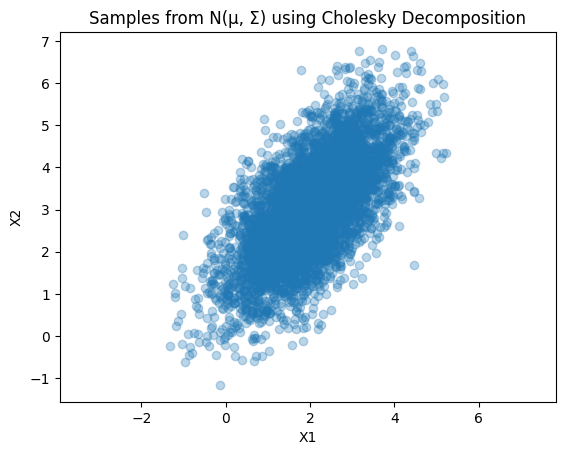

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define mean vector and covariance matrix
mu = np.array([2, 3])  # Mean (2D)
Sigma = np.array([[1.0, 0.8], [0.8, 1.5]])  # Covariance matrix

# Compute Cholesky decomposition
B = np.linalg.cholesky(Sigma)

# Generate standard normal samples (Z ~ N(0, I))
n_samples = 5000
Z = np.random.randn(2, n_samples)  # 2D standard normal samples

# Transform standard normal samples to multivariate normal
X = mu[:, np.newaxis] + B @ Z  # Affine transformation

# Plot results
plt.scatter(X[0], X[1], alpha=0.3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Samples from N(μ, Σ) using Cholesky Decomposition')
plt.axis('equal')
plt.show()



Besides Cholesky decomposition, there are other ways to obtain B:

    Eigenvalue decomposition: Σ = QΛQ^⊤
    
    Singular Value Decomposition (SVD): Σ = UDV^⊤


or

    np.random.multivariate_normal(mu, Sigma, size)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define mean vector and covariance matrix
mu = np.array([2, 3])
Sigma = np.array([[1.0, 0.8], [0.8, 1.5]])  # Correlated variables

# Generate multivariate normal random vectors
samples = np.random.multivariate_normal(mu, Sigma, size=1000)

# Scatter plot
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Multivariate Normal Samples")
plt.show()

### Simulating Random Processes

A random process (or stochastic process) is a collection of random variables indexed by time or space, e.g., X(t) for t≥0.

**Types of Random Processes**

<table>
  <tr>
    <th>Type</th>
    <th>Description</th>
    <th>Example</th>
    <th>Application</th>
  </tr>
  <tr>
    <td>Discrete-Time</td>
    <td>Observed at specific times</td>
    <td>Daily stock prices</td>
    <td>Finance, queueing</td>
  </tr>
  <tr>
    <td>Continuous-Time</td>
    <td>Defined for all times</td>
    <td>Brownian motion</td>
    <td>Physics, finance</td>
  </tr>
  <tr>
    <td>Stationary</td>
    <td>Statistical properties constant</td>
    <td>White noise</td>
    <td>Signal processing</td>
  </tr>
  <tr>
    <td>Non-Stationary</td>
    <td>Properties change over time</td>
    <td>Random walk</td>
    <td>Stock markets</td>
  </tr>
  <tr>
    <td>Markovian</td>
    <td>Future depends only on present</td>
    <td>Random walk</td>
    <td>NLP, AI</td>
  </tr>
  <tr>
    <td>Non-Markovian</td>
    <td>Future depends on history</td>
    <td>Fractional Brownian motion</td>
    <td>Neuroscience</td>
  </tr>
  <tr>
    <td>IID Process</td>
    <td>Independent & same distribution</td>
    <td>White noise</td>
    <td>Statistics, ML</td>
  </tr>
  <tr>
    <td>Martingales</td>
    <td>Expected future value = present</td>
    <td>Fair betting games</td>
    <td>Finance</td>
  </tr>
</table>


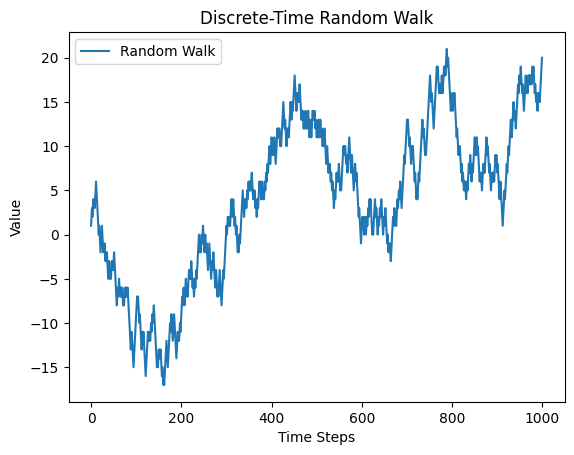

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n_steps = 1000
steps = np.random.choice([-1, 1], n_steps)  # Random steps
random_walk = np.cumsum(steps)              # Cumulative sum


# Plot
plt.plot(random_walk, label="Random Walk")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Discrete-Time Random Walk")
plt.legend()
plt.show()

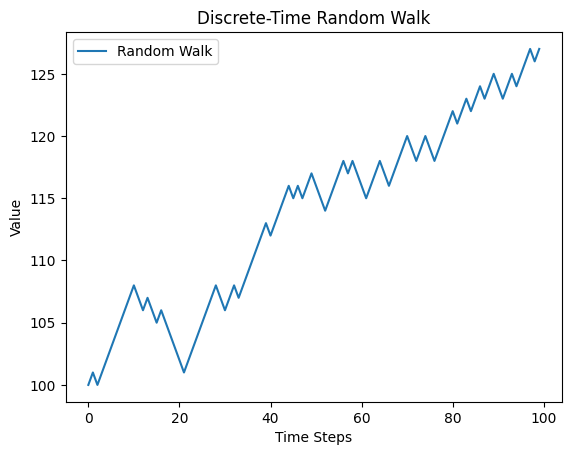

In [2]:
# 1. Discrete-Time Process (Random Walk) - Daily Stock Price Simulation

import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # Number of time steps
X = np.zeros(T)
X[0] = 100  # Initial stock price

# Random walk: each step is +1 or -1 with equal probability
for t in range(1, T):
    X[t] = X[t-1] + np.random.choice([-1, 1])

# Plot
plt.plot(X, label="Random Walk")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Discrete-Time Random Walk")
plt.legend()
plt.show()

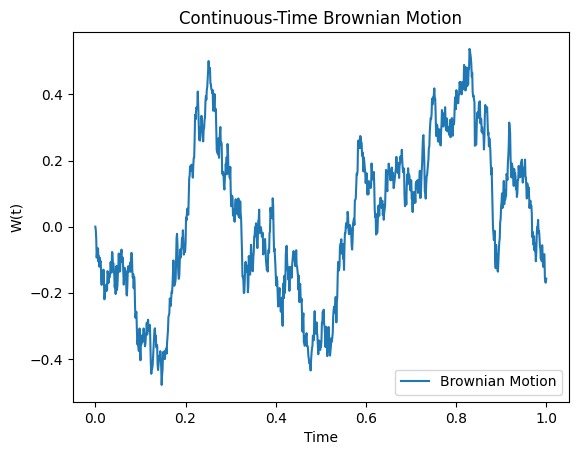

In [3]:
# 2. Continuous-Time Process (Brownian Motion)

import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0  # Total time
N = 1000  # Number of steps
dt = T/N
t = np.linspace(0, T, N)

# Brownian motion: W_t = W_(t-1) + sqrt(dt) * N(0,1)
W = np.zeros(N)
for i in range(1, N):
    W[i] = W[i-1] + np.sqrt(dt) * np.random.normal()

# Plot
plt.plot(t, W, label="Brownian Motion")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.title("Continuous-Time Brownian Motion")
plt.legend()
plt.show()

**Brownian Motion (Wiener Process):**

A continuous-time process with independent, normally distributed increments.

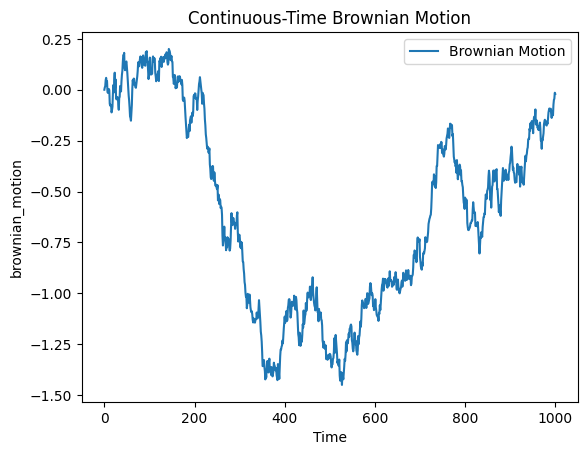

In [8]:
import numpy as np
n_steps = 1000
T = 1.0
dt = T / n_steps
increments = np.random.normal(0, np.sqrt(dt), n_steps)  # N(0, sqrt(dt))
brownian_motion = np.cumsum(increments)                 # Cumulative sum
brownian_motion = np.insert(brownian_motion, 0, 0)      # Start at 0


# Plot
plt.plot( brownian_motion, label="Brownian Motion")
plt.xlabel("Time")
plt.ylabel("brownian_motion")
plt.title("Continuous-Time Brownian Motion")
plt.legend()
plt.show()

In [ ]:
# Geometric Brownian Motion

import numpy as np
S0 = 100  # Initial price
mu = 0.1  # Drift
sigma = 0.2  # Volatility
T = 1.0
n_steps = 1000
dt = T / n_steps
t = np.linspace(0, T, n_steps + 1)
W = np.cumsum(np.random.normal(0, np.sqrt(dt), n_steps))
W = np.insert(W, 0, 0)  # Brownian motion
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

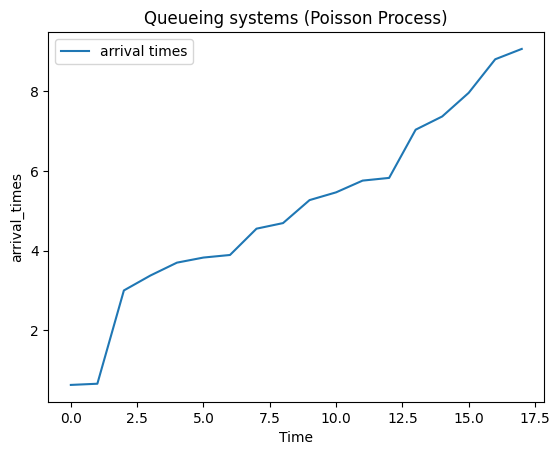

In [10]:
# Example - Queueing systems (Poisson Process)
# Models events occurring randomly over time (e.g., customer arrivals). Inter-arrival times are exponential.

import numpy as np
lambda_rate = 2.0  # Events per unit time
T = 10.0           # Total time
inter_arrivals = np.random.exponential(1/lambda_rate, size=100)
arrival_times = np.cumsum(inter_arrivals)
arrival_times = arrival_times[arrival_times <= T]  # Truncate at T


# Plot
plt.plot( arrival_times, label="arrival times")
plt.xlabel("Time")
plt.ylabel("arrival_times")
plt.title("Queueing systems (Poisson Process)")
plt.legend()
plt.show()

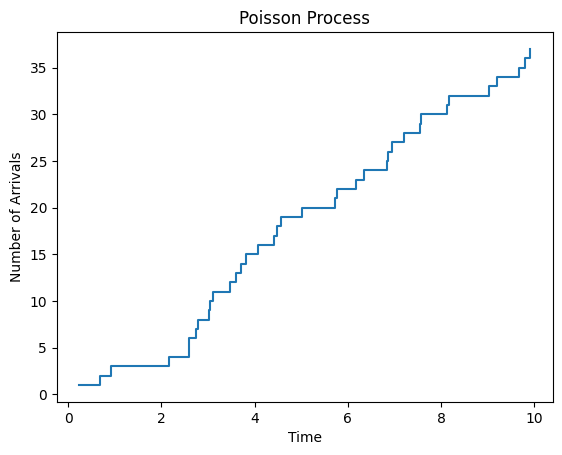

In [13]:
# Poisson Process (Event Arrival)
# Example: Call Center Requests Over Time

import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_ = 5  # Average events per unit time
T = 10  # Total time
events = np.cumsum(np.random.exponential(1/lambda_, size=50))  # Arrival times
events = events[events < T]  # Keep only within time window

# Plot
plt.step(events, range(1, len(events) + 1), where='post')
plt.xlabel("Time")
plt.ylabel("Number of Arrivals")
plt.title("Poisson Process")
plt.show()


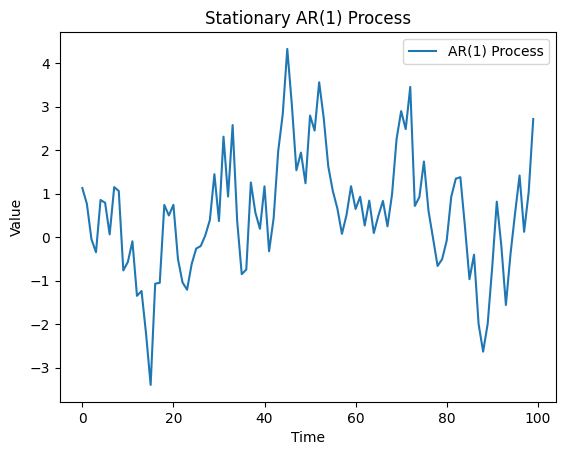

In [11]:
# 3. Stationary Process (AR(1) Model)
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100
phi = 0.7  # AR coefficient
X = np.zeros(T)
X[0] = np.random.normal()

# AR(1) process: X_t = phi * X_(t-1) + noise
for t in range(1, T):
    X[t] = phi * X[t-1] + np.random.normal()

# Plot
plt.plot(X, label="AR(1) Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Stationary AR(1) Process")
plt.legend()
plt.show()


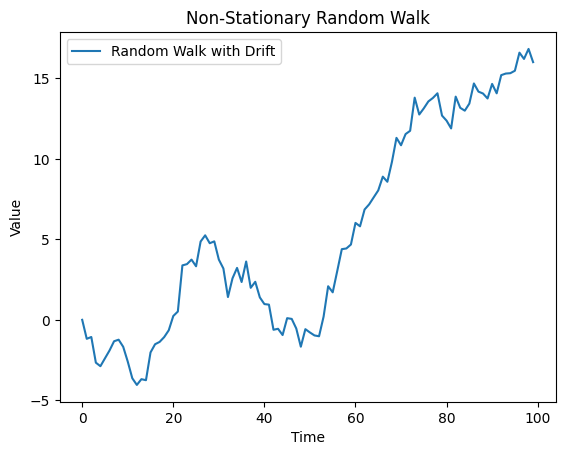

In [12]:
# 4. Non-Stationary Process (Random Walk)
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100
mu = 0.1  # Drift term
sigma = 1  # Volatility
X = np.zeros(T)

# Random Walk with Drift: X_t = X_(t-1) + mu + noise
for t in range(1, T):
    X[t] = X[t-1] + mu + sigma * np.random.normal()

# Plot
plt.plot(X, label="Random Walk with Drift")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Non-Stationary Random Walk")
plt.legend()
plt.show()


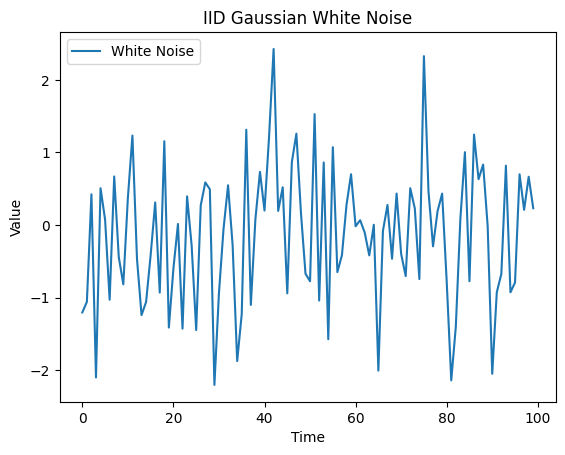

In [14]:
# IID Process (White Noise)
# Example: Independent Gaussian Noise

import numpy as np
import matplotlib.pyplot as plt

# Generate white noise
T = 100
noise = np.random.normal(0, 1, T)

# Plot
plt.plot(noise, label="White Noise")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("IID Gaussian White Noise")
plt.legend()
plt.show()


In [15]:
# 5. Markov Process (Markov Chain)
# Example: Simple Weather Model

import numpy as np

# Transition Matrix (Sunny=0, Rainy=1)
P = np.array([[0.8, 0.2], [0.4, 0.6]])

# Simulate Markov Chain
T = 10
states = [0]  # Start in Sunny (0)
for _ in range(T - 1):
    states.append(np.random.choice([0, 1], p=P[states[-1]]))

# Print sequence
weather = ["Sunny", "Rainy"]
print([weather[s] for s in states])


['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny']


## Hidden Markov Models (HMMs)

A Hidden Markov Model (HMM) consists of:

* Hidden States: The actual state of the system (e.g., "Rainy" or "Sunny").

* Observations: The observed data (e.g., "Umbrella used" or "No umbrella").

* Transition Probabilities: Probabilities of moving from one state to another.

* Emission Probabilities: Probabilities of generating an observation given a state.

Goal: Infer hidden weather states from umbrella observations.

In [31]:
import numpy as np

# Hidden states: Sunny=0, Rainy=1
states = ["Sunny", "Rainy"]

# Observations: No Umbrella=0, Umbrella=1
observations = ["No Umbrella", "Umbrella"]

# Transition Matrix (State -> Next State)
transition_probs = np.array([
    [0.8, 0.2],  # Sunny → Sunny (80%), Sunny → Rainy (20%)
    [0.4, 0.6]   # Rainy → Sunny (40%), Rainy → Rainy (60%)
])

# Emission Matrix (State -> Observation)
emission_probs = np.array([
    [0.9, 0.1],  # Sunny → No Umbrella (90%), Sunny → Umbrella (10%)
    [0.2, 0.8]   # Rainy → No Umbrella (20%), Rainy → Umbrella (80%)
])

# Initial Probabilities
initial_probs = np.array([0.5, 0.5])  # Start equally in Sunny/Rainy


def generate_hmm_sequence(length):
    hidden_states = []
    observations_seq = []

    # Choose initial state
    state = np.random.choice([0, 1], p=initial_probs)

    for _ in range(length):
        hidden_states.append(state)
        obs = np.random.choice([0, 1], p=emission_probs[state])
        observations_seq.append(obs)
        state = np.random.choice([0, 1], p=transition_probs[state])  # Move to next state

    return hidden_states, observations_seq

# Generate a sequence of 10 days
hidden_states, hidden_observations = generate_hmm_sequence(10)
print("Hidden States:", [states[s] for s in hidden_states])
print("Observations:", [observations[ob] for ob in hidden_observations])


Hidden States: ['Sunny', 'Rainy', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny']
Observations: ['No Umbrella', 'Umbrella', 'No Umbrella', 'No Umbrella', 'No Umbrella', 'No Umbrella', 'No Umbrella', 'No Umbrella', 'No Umbrella', 'No Umbrella']


## Markov Chain Monte Carlo

subtopic: Bayesian Inference using Monte Carlo Methods

MCMC algorithms generate samples from a target probability distribution by constructing a Markov Chain that converges to the target distribution.

* Monte Carlo Aspect: Use samples to approximate integrals...
* Markov Chain Aspect: Generate a sequence x1, x2, ..., xN where each xt+1 is drawn based on xt.

The goal is to construct a Markov chain that converges to a target distribution p(x), then use samples from the chain to estimate properties like expectations or probabilities.

**Key Concepts**

1. ***Stationary Distribution:*** A distribution π(x) that the Markov chain eventually converges to, ideally our target p(x).
2. ***Ergodicity:*** The chain explores the entire space and converges to π(x) regardless of the starting point.
3. ***Detailed Balance:*** A condition ensuring the chain’s equilibrium is p(x)T(x→x′) = p(x′)T(x'→x), where T is the transition probability.

**How It Works**

The goal is to sample from a target distribution (say, p(x)), which might be too complicated to sample directly. MCMC does this by:

1. Starting at some initial point.
2. Proposing a new point based on a simple "proposal distribution" (e.g., a random step).
3. Accepting or rejecting the new point based on how likely it is under p(x).
4. Repeating this process many times.

### Metropolis-Hastings algorithm

Metropolis-Hastings is one of the most fundamental MCMC methods. It's used when direct sampling is difficult.

 It generates samples from a target distribution P(x) by:

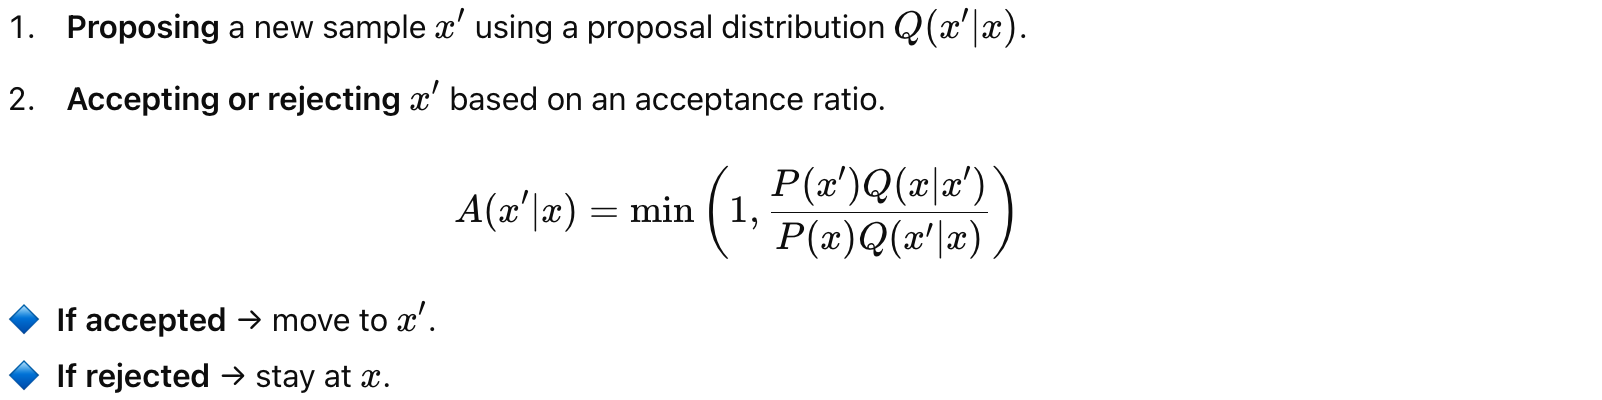

before reading....

recall acceptance-rejection sampling

Idea: Propose a new state and accept or reject it based on a probability ratio.

In [ ]:
# Sample from p(x)∝e^(−x^2/2) (unnormalized Gaussian).

import numpy as np
def target_pdf(x):
    return np.exp(-x**2 / 2)  # Unnormalized N(0,1)

n_samples = 10000
x = np.zeros(n_samples)
x[0] = 0.0  # Initial state
for t in range(n_samples - 1):
    x_prime = x[t] + np.random.normal(0, 1)  # Proposal (symmetric)
    alpha = min(1, target_pdf(x_prime) / target_pdf(x[t]))
    if np.random.uniform(0, 1) < alpha:
        x[t + 1] = x_prime
    else:
        x[t + 1] = x[t]

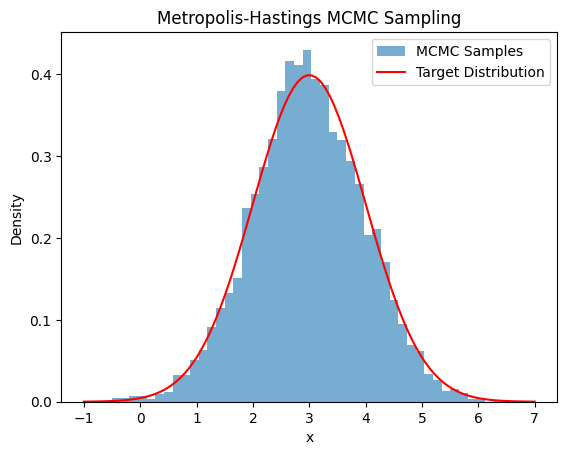

In [18]:
# Example: Sampling from a Normal Distribution

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Target distribution: Normal N(3, 1)
def target_distribution(x):
    return stats.norm.pdf(x, loc=3, scale=1)  # Gaussian with mean 3 and std 1

# Metropolis-Hastings algorithm
def metropolis_hastings(target, steps=10000, proposal_std=1.0):
    samples = []
    x = 0  # Initial state
    for _ in range(steps):
        x_new = x + np.random.normal(0, proposal_std)  # Proposal step
        acceptance_ratio = target(x_new) / target(x)

        if np.random.rand() < acceptance_ratio:  # Accept with probability A(x'|x)
            x = x_new

        samples.append(x)
    return np.array(samples)

# Run MCMC
samples = metropolis_hastings(target_distribution)

# Plot results
plt.hist(samples, bins=50, density=True, alpha=0.6, label="MCMC Samples")
x = np.linspace(-1, 7, 100)
plt.plot(x, target_distribution(x), label="Target Distribution", color='red')
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.title("Metropolis-Hastings MCMC Sampling")
plt.show()


Estimated Mean Theta: 0.6718


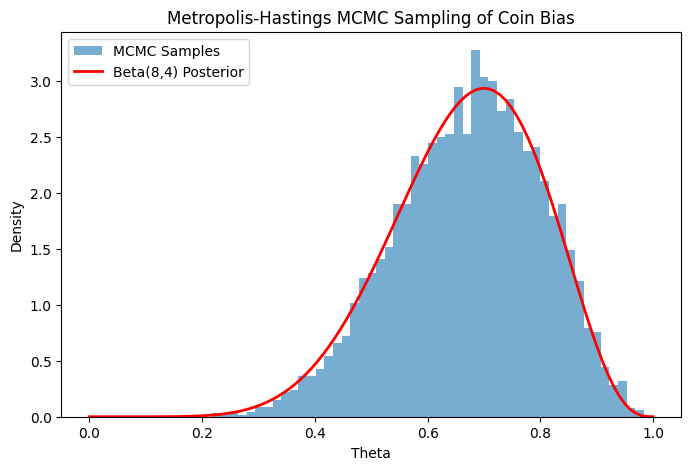

In [24]:
# MCMC shines in Bayesian statistics, where we sample from a posterior p(θ∣D)∝p(D∣θ)p(θ).
# Problem: Infer a coin’s bias θ (probability of heads) given 7 heads, 3 tails.
# Prior: p(θ)∼Beta(1,1) (uniform).
# Likelihood: p(D∣θ) = θ^7.(1−θ)^3
# Posterior: p(θ∣D)∝θ^7.(1−θ)^3


import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Posterior function (unnormalized Beta(8,4))
def posterior(theta):
    return theta**7 * (1 - theta)**3 if 0 <= theta <= 1 else 0

# Metropolis-Hastings MCMC
n_samples = 10000
theta = np.zeros(n_samples)
theta[0] = 0.5  # Initial guess

for t in range(1, n_samples):
    theta_prime = theta[t-1] + np.random.normal(0, 0.1)  # Proposal
    if theta_prime < 0 or theta_prime > 1:  # Reflect theta back if out of bounds
        theta_prime = 1 - abs(theta_prime)

    alpha = min(1, posterior(theta_prime) / posterior(theta[t-1]))
    if np.random.uniform(0, 1) < alpha:
        theta[t] = theta_prime  # Accept
    else:
        theta[t] = theta[t-1]  # Reject

# Burn-in period (discard first 1000 samples)
burn_in = 1000
theta_samples = theta[burn_in:]

# Compute Mean Estimate
mean_theta = np.mean(theta_samples)
print(f"Estimated Mean Theta: {mean_theta:.4f}")

# Plot histogram of MCMC samples
plt.figure(figsize=(8,5))
plt.hist(theta_samples, bins=50, density=True, alpha=0.6, label="MCMC Samples")

# True Beta(8,4) posterior for comparison
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, 8, 4), 'r-', lw=2, label="Beta(8,4) Posterior")

plt.xlabel("Theta")
plt.ylabel("Density")
plt.legend()
plt.title("Metropolis-Hastings MCMC Sampling of Coin Bias")
plt.show()

### Gibbs Sampling

Gibbs Sampling is a special case of the Metropolis-Hastings (MH) algorithm where we sample each variable conditionally from its full conditional distribution.

It is widely used in Bayesian inference, hidden Markov models (HMMs), and probabilistic graphical models.

Use Gibbs Sampling

When we cannot directly sample from a joint distribution P(x1, x2, ...,xn).

But we can sample from the conditional distributions P(xi∣x−i).

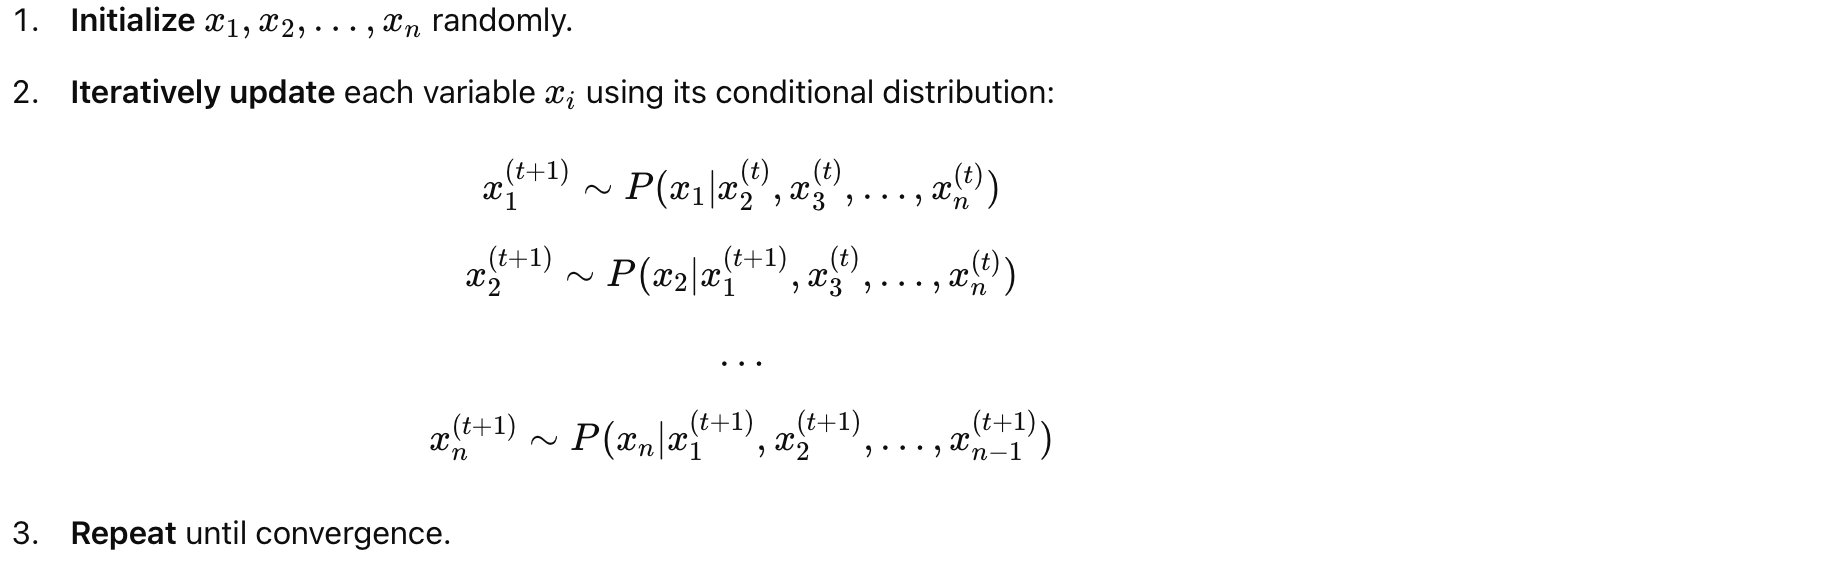

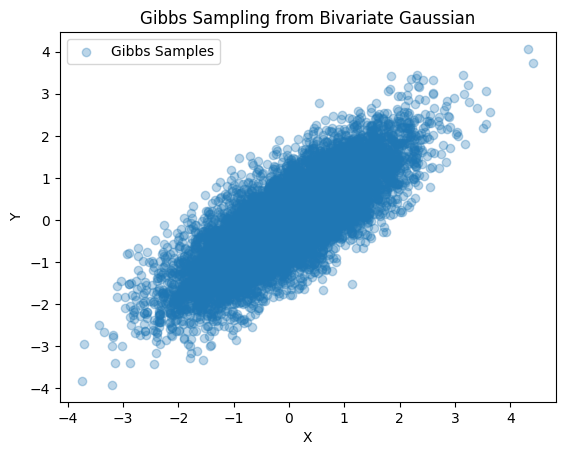

In [20]:
import numpy as np
n_samples = 10000
rho = 0.8
samples = np.zeros((n_samples, 2))
samples[0] = [0, 0]  # Initial state
for t in range(n_samples - 1):
    # x1 | x2 ~ N(rho * x2, 1 - rho^2)
    samples[t + 1, 0] = np.random.normal(rho * samples[t, 1], np.sqrt(1 - rho**2))
    # x2 | x1 ~ N(rho * x1, 1 - rho^2)
    samples[t + 1, 1] = np.random.normal(rho * samples[t + 1, 0], np.sqrt(1 - rho**2))

# Plot results
plt.scatter(samples[:,0], samples[:,1], alpha=0.3, label="Gibbs Samples")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Gibbs Sampling from Bivariate Gaussian")
plt.show()

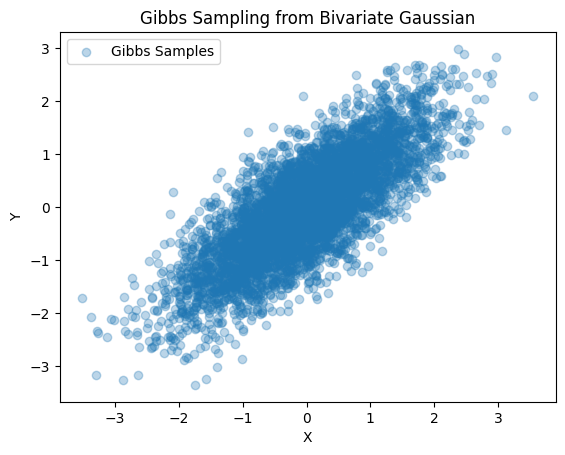

In [19]:
# Example: Sampling from a Bivariate Gaussian

import numpy as np
import matplotlib.pyplot as plt

# Parameters for bivariate Gaussian
mu_x, mu_y = 0, 0
sigma_x, sigma_y = 1, 1
rho = 0.8  # Correlation

# Conditional distributions
def sample_x_given_y(y):
    return np.random.normal(mu_x + rho * (y - mu_y) * sigma_x / sigma_y, np.sqrt(1 - rho**2) * sigma_x)

def sample_y_given_x(x):
    return np.random.normal(mu_y + rho * (x - mu_x) * sigma_y / sigma_x, np.sqrt(1 - rho**2) * sigma_y)

# Gibbs Sampler
def gibbs_sampling(steps=5000):
    samples_x, samples_y = [], []
    x, y = 0, 0  # Start at (0,0)
    for _ in range(steps):
        x = sample_x_given_y(y)
        y = sample_y_given_x(x)
        samples_x.append(x)
        samples_y.append(y)
    return np.array(samples_x), np.array(samples_y)

# Run Gibbs Sampling
samples_x, samples_y = gibbs_sampling()

# Plot results
plt.scatter(samples_x, samples_y, alpha=0.3, label="Gibbs Samples")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Gibbs Sampling from Bivariate Gaussian")
plt.show()

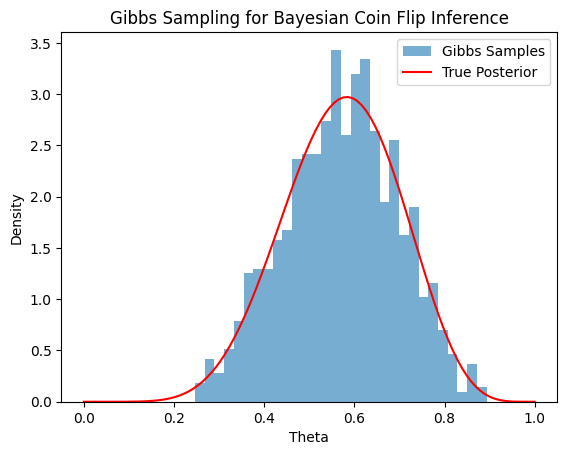

In [22]:
# Bayesian Inference Using Gibbs Sampling
# We observe n coin flips and estimate the unknown probability θ of heads.

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Observed data (coin flips: 1=Heads, 0=Tails)
data = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1])  # 6 heads, 4 tails
a, b = 2, 2  # Prior Beta(2,2)

# Gibbs Sampling
def gibbs_coin(steps=1000):
    theta_samples = []
    theta = np.random.rand()  # Start with a random theta

    for _ in range(steps):
        # Sample from Beta posterior
        theta = np.random.beta(a + sum(data), b + len(data) - sum(data))
        theta_samples.append(theta)

    return np.array(theta_samples)

# Run Gibbs Sampling
samples = gibbs_coin()

# Plot posterior distribution
plt.hist(samples, bins=30, density=True, alpha=0.6, label="Gibbs Samples")
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, a + sum(data), b + len(data) - sum(data)), label="True Posterior", color='red')
plt.xlabel("Theta")
plt.ylabel("Density")
plt.legend()
plt.title("Gibbs Sampling for Bayesian Coin Flip Inference")
plt.show()


### Hamiltonian Monte Carlo (HMC)

Unlike traditional MCMC methods (like Metropolis-Hastings or Gibbs Sampling), HMC reduces random walk behavior, making it more efficient, especially in high-dimensional spaces, that improves sampling efficiency by using gradient information.

**Key Concepts:**

Hamiltonian Dynamics, Position, Momentum, Potential energy, Kinetic energy, Hamilton’s equations, Leapfrog Integrator, reversibility and energy conservation.

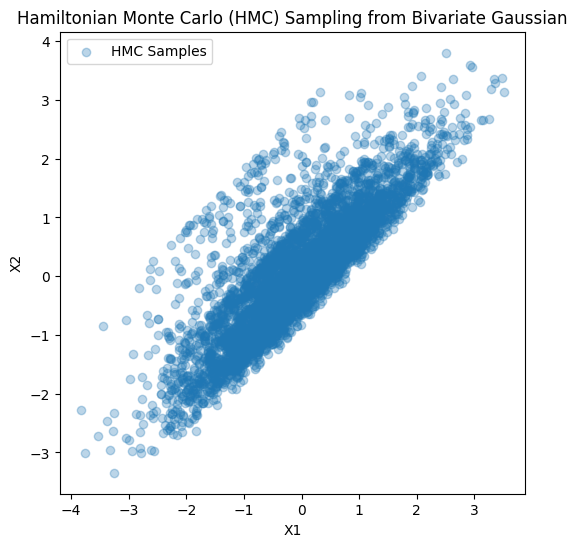

In [25]:
# HMC for Sampling from a 2D Gaussian

import numpy as np
import matplotlib.pyplot as plt

# Define potential energy function U(q) (negative log probability)
def U(q):
    return 0.5 * q.T @ np.linalg.inv(Sigma) @ q  # Quadratic form

# Gradient of U(q)
def grad_U(q):
    return np.linalg.inv(Sigma) @ q

# Leapfrog Integrator
def leapfrog(q, p, epsilon, L):
    p = p - 0.5 * epsilon * grad_U(q)  # Half-step momentum update
    for _ in range(L):
        q = q + epsilon * p  # Full-step position update
        if _ != L - 1:
            p = p - epsilon * grad_U(q)  # Full-step momentum update
    p = p - 0.5 * epsilon * grad_U(q)  # Half-step final momentum update
    return q, -p  # Negate momentum for reversibility

# HMC Sampler
def hmc(num_samples, epsilon=0.1, L=10):
    samples = []
    q = np.random.randn(2)  # Initial state

    for _ in range(num_samples):
        p = np.random.randn(2)  # Sample momentum
        q_new, p_new = leapfrog(q, p, epsilon, L)  # Propose new state

        # Compute Hamiltonian for acceptance
        H_current = U(q) + 0.5 * np.dot(p, p)
        H_new = U(q_new) + 0.5 * np.dot(p_new, p_new)

        # Metropolis acceptance criterion
        if np.random.rand() < np.exp(H_current - H_new):
            q = q_new  # Accept move

        samples.append(q)

    return np.array(samples)

# Covariance matrix for bivariate Gaussian
Sigma = np.array([[1.0, 0.9], [0.9, 1.0]])

# Run HMC
samples = hmc(num_samples=5000, epsilon=0.1, L=20)

# Plot samples
plt.figure(figsize=(6,6))
plt.scatter(samples[:,0], samples[:,1], alpha=0.3, label="HMC Samples")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Hamiltonian Monte Carlo (HMC) Sampling from Bivariate Gaussian")
plt.show()


# Monte Carlo Estimation

Monte Carlo Estimation is a powerful technique used to approximate integrals, expectations, probabilities, and optimization solutions using random sampling.

## Examples

### Monte Carlo Estimation of Expected Values

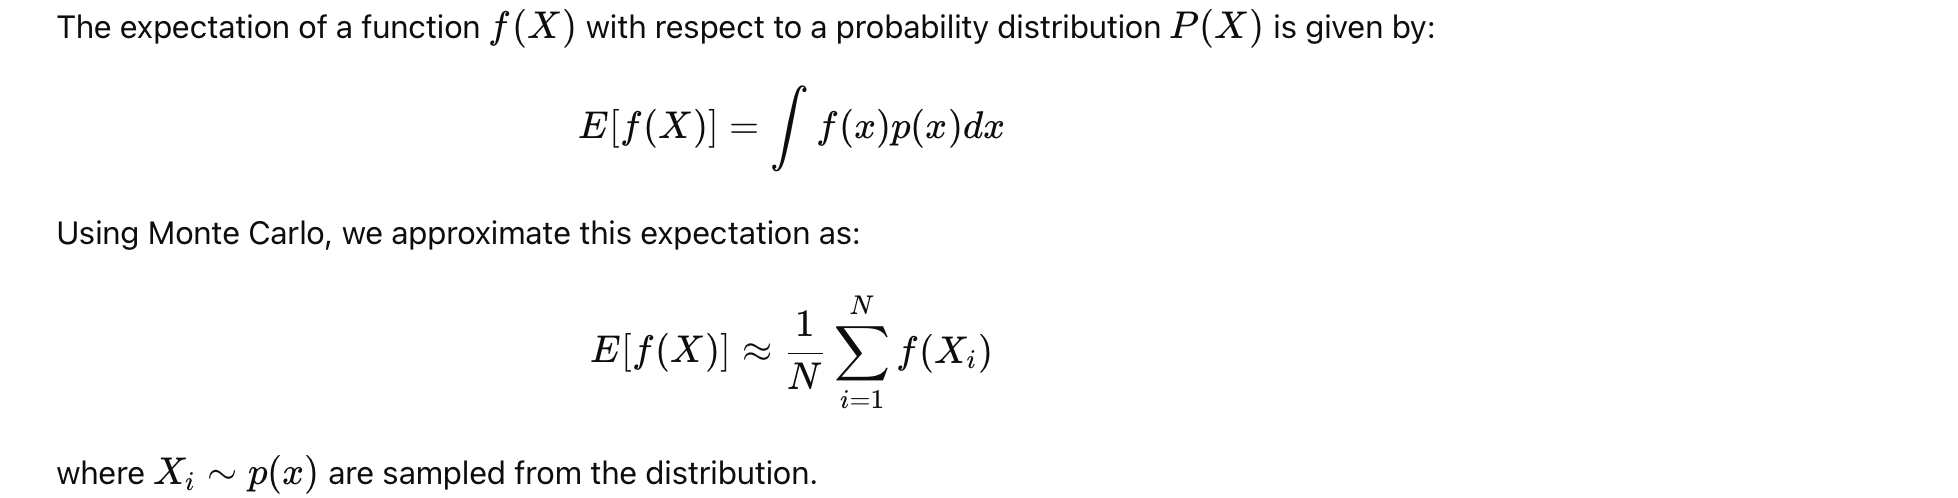

In [ ]:
# Example: Estimating the Mean of a Distribution

import numpy as np

N = 10000  # Number of samples
X = np.random.normal(0, 1, N)  # Sample from N(0,1)
estimate = np.mean(X**2)  # Approximate E[X^2]

print(f"Monte Carlo Estimate of E[X^2]: {estimate}")


### Monte Carlo Integration

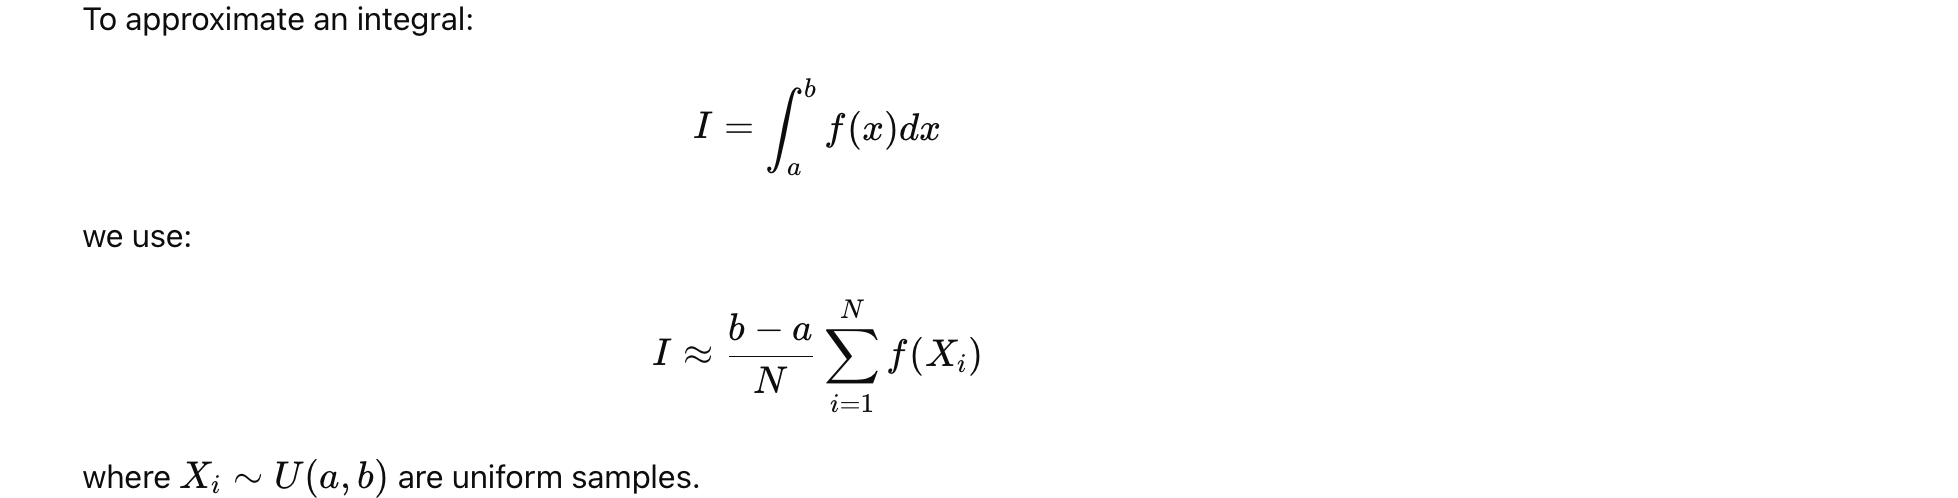

In [ ]:
N = 10000
X = np.random.uniform(-2, 2, N)
integral_estimate = np.mean(np.exp(X)) * 4  # Monte Carlo approximation
print(f"Estimated Integral: {integral_estimate}")

### Monte Carlo Estimation of Pi

We can estimate π using a quarter-circle inscribed in a square.

    π ≈ 4×points inside circle/total points


In [ ]:
import matplotlib.pyplot as plt

N = 10000
x, y = np.random.uniform(-1, 1, (2, N))
inside_circle = x**2 + y**2 <= 1

pi_estimate = 4 * np.mean(inside_circle)
print(f"Estimated π: {pi_estimate}")

# Plotting
plt.figure(figsize=(5,5))
plt.scatter(x[inside_circle], y[inside_circle], color='blue', alpha=0.5, s=1)
plt.scatter(x[~inside_circle], y[~inside_circle], color='red', alpha=0.5, s=1)
plt.title("Monte Carlo Estimation of π")
plt.show()

### Importance Sampling

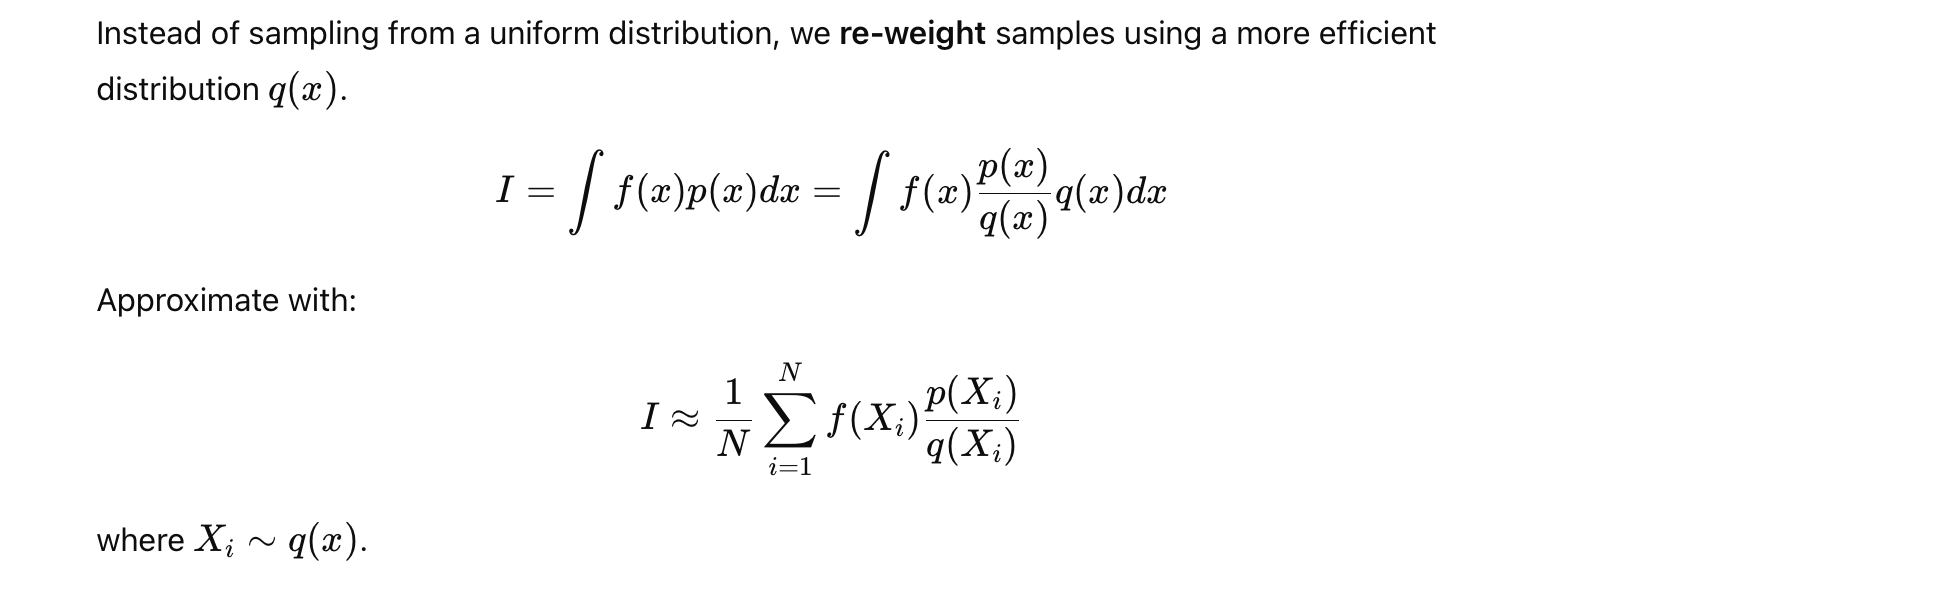

In [ ]:
from scipy.stats import norm

N = 10000
X = np.random.normal(1, 1, N)  # Sample from q(x) = N(1,1)
p_x = norm.pdf(X, 0, 1)  # True distribution
q_x = norm.pdf(X, 1, 1)  # Proposal distribution
weights = p_x / q_x  # Importance weights

estimate = np.mean(np.exp(X) * weights)
print(f"Importance Sampling Estimate: {estimate}")

## Crude Monte Carlo

Crude Monte Carlo (CMC) is the simplest form of Monte Carlo estimation, where random sampling is used to approximate expectations, integrals, and probabilities without any variance reduction techniques like importance sampling or stratified sampling.

In [ ]:
#Example: Estimating ∫0-1 e^x dx

import numpy as np

N = 10000
X = np.random.uniform(0, 1, N)
integral_estimate = (1 - 0) * np.mean(np.exp(X))  # (b - a) * avg(f(X))

print(f"Crude Monte Carlo Estimate: {integral_estimate}")

In [ ]:
# Example: Estimating E[X^2] for X∼N(0,1)

X = np.random.normal(0, 1, N)
estimate = np.mean(X**2)

print(f"Crude Monte Carlo Estimate of E[X^2]: {estimate}")

In [ ]:
# Crude Monte Carlo for Probability Estimation

X = np.random.normal(0, 1, N)
threshold = 1.5
prob_estimate = np.mean(X > threshold)

print(f"Crude Monte Carlo Probability Estimate: {prob_estimate}")

## Variance Reduction

Monte Carlo methods often suffer from high variance, requiring large sample sizes for accurate estimates.

Variance reduction techniques help improve efficiency by reducing the number of samples needed for a given accuracy.

### Importance Sampling

Instead of sampling from a uniform distribution, we sample from a more efficient distribution q(x) and re-weight the estimates.

In [ ]:
import numpy as np
from scipy.stats import norm

N = 10000
X = np.random.normal(1, 1, N)  # Sample from q(x) = N(1,1)
p_x = norm.pdf(X, 0, 1)  # True distribution
q_x = norm.pdf(X, 1, 1)  # Proposal distribution
weights = p_x / q_x  # Importance weights

estimate = np.mean(np.exp(X) * weights)
print(f"Importance Sampling Estimate: {estimate}")


### Control Variates

Uses a function g(X) whose expectation is known to reduce variance.

In [ ]:
N = 10000
X = np.random.uniform(0, 1, N)
g_X = X  # Control variate
c = -np.cov(X**2, g_X)[0, 1] / np.var(g_X)

estimate = np.mean(X**2 + c * (g_X - 0.5))
print(f"Control Variate Estimate: {estimate}")


### Antithetic Variates

Instead of using independent samples, generate correlated samples that reduce variance.

In [32]:
N = 5000  # Half the sample size
X = np.random.uniform(0, 1, N)
Y = 1 - X  # Antithetic variates

estimate = np.mean((np.exp(X) + np.exp(Y)) / 2)
print(f"Antithetic Variate Estimate: {estimate}")


Antithetic Variate Estimate: 1.718564647830176


### Stratified Sampling

Divide the domain into strata (subintervals) and sample from each stratum separately.

In [ ]:
strata = 10
N = 10000
samples_per_stratum = N // strata

estimates = []
for i in range(strata):
    X = np.random.uniform(i / strata, (i + 1) / strata, samples_per_stratum)
    estimates.append(np.mean(X**2))

estimate = np.mean(estimates)
print(f"Stratified Sampling Estimate: {estimate}")

### Latin Hypercube Sampling (LHS)

Instead of pure random sampling, LHS ensures better coverage by dividing the domain into equal intervals.

In [ ]:
from scipy.stats import qmc

N = 10000
sampler = qmc.LatinHypercube(d=1)
X = sampler.random(N).flatten()

estimate = np.mean(X**2)
print(f"Latin Hypercube Sampling Estimate: {estimate}")

# Monte Carlo for Optimization

Monte Carlo methods can be used to solve optimization problems, especially when:
* The function is non-differentiable or high-dimensional.
* There are multiple local minima, making gradient-based methods ineffective.
* The function is stochastic or noisy (e.g., reinforcement learning, finance).

## Monte Carlo Search (Random Search)

In [ ]:
# Example: Finding the Minimum of f(x) = x^2 + sin(5x)

import numpy as np

def f(x):
    return x**2 + np.sin(5*x)

N = 10000  # Number of samples
X = np.random.uniform(-2, 2, N)  # Random search space
best_x = X[np.argmin(f(X))]  # Find best x

print(f"Monte Carlo Minimum Estimate: x = {best_x}, f(x) = {f(best_x)}")

## Simulated Annealing (SA)

Inspired by metallurgical annealing, SA:

    🔥 Starts with a high "temperature" (allows exploration).
    ❄ Gradually cools down (focuses on exploitation).
    🔄 Accepts worse solutions with some probability to escape local minima.

Example: Neural Network Weight Optimization

In [ ]:
# Example: Finding the Minimum of f(x) = x^2 + sin(5x)

import numpy as np

def f(x):
    return x**2 + np.sin(5*x)

def simulated_annealing(f, x0, T=1.0, alpha=0.99, iterations=1000):
    x = x0
    best_x, best_f = x, f(x)

    for i in range(iterations):
        new_x = x + np.random.uniform(-0.1, 0.1)  # Small random perturbation
        new_f = f(new_x)

        if new_f < best_f or np.random.rand() < np.exp(-(new_f - best_f) / T):
            x, best_f = new_x, new_f

        T *= alpha  # Reduce temperature

    return best_x, best_f

best_x, best_f = simulated_annealing(f, x0=np.random.uniform(-2, 2))
print(f"Simulated Annealing Minimum Estimate: x = {best_x}, f(x) = {best_f}")


## Cross-Entropy Method

CEM follows these steps:

    1️⃣ Sample solutions from a probability distribution.
    2️⃣ Evaluate their performance using an objective function.
    3️⃣ Select the top-k (elite) solutions.
    4️⃣ Update the distribution based on the elite solutions.
    5️⃣ Repeat until convergence.

In [ ]:
import numpy as np

def f(x):
    return x**2 + np.sin(5*x)

def cross_entropy_method(f, num_samples=100, elite_frac=0.2, iterations=50):
    mu, sigma = 0, 1  # Initialize mean and variance

    for _ in range(iterations):
        X = np.random.normal(mu, sigma, num_samples)  # Sample solutions
        scores = f(X)  # Evaluate
        elite_num = int(elite_frac * num_samples)

        elite_X = X[np.argsort(scores)[:elite_num]]  # Select top-k
        mu, sigma = np.mean(elite_X), np.std(elite_X)  # Update distribution

    return mu, f(mu)

best_x, best_f = cross_entropy_method(f)
print(f"Cross-Entropy Minimum Estimate: x = {best_x}, f(x) = {best_f}")


## Genetic Algorithms (GA)

Inspired by natural selection, GA uses:

    🧬 Mutation – Randomly change solutions.
    👪 Crossover – Combine solutions to create new ones.
    🏆 Selection – Keep the best solutions.

In [ ]:
# Example: Finding the Minimum of f(x) = x^2 + sin(5x)
import numpy as np

def f(x):
    return x**2 + np.sin(5*x)

def genetic_algorithm(f, pop_size=20, generations=50, mutation_rate=0.1):
    X = np.random.uniform(-2, 2, pop_size)  # Initial population

    for _ in range(generations):
        fitness = -f(X)  # Minimize function (negative fitness)
        parents = X[np.argsort(fitness)][-pop_size//2:]  # Select best half

        offspring = np.mean(parents) + np.random.randn(pop_size//2) * 0.1  # Crossover + mutation
        X = np.concatenate([parents, offspring])  # New population

    best_x = X[np.argmin(f(X))]
    return best_x, f(best_x)

best_x, best_f = genetic_algorithm(f)
print(f"Genetic Algorithm Minimum Estimate: x = {best_x}, f(x) = {best_f}")

## Particle Swarm Optimization (PSO)

Inspired by bird flocking, PSO uses:

    🦅 Each particle (solution) moves through the search space.
    🌪️ Particles are influenced by their own best solution and the global best solution.

In [ ]:
# Example: Finding the Minimum of f(x) = x^2 + sin(5x)

import numpy as np

def f(x):
    return x**2 + np.sin(5*x)

def particle_swarm(f, num_particles=20, iterations=50, w=0.5, c1=1.5, c2=1.5):
    X = np.random.uniform(-2, 2, num_particles)  # Particle positions
    V = np.zeros_like(X)  # Velocities
    P_best = X.copy()  # Best personal positions
    G_best = X[np.argmin(f(X))]  # Global best

    for _ in range(iterations):
        r1, r2 = np.random.rand(2)
        V = w * V + c1 * r1 * (P_best - X) + c2 * r2 * (G_best - X)  # Velocity update
        X += V  # Position update

        P_best = np.where(f(X) < f(P_best), X, P_best)  # Update personal bests
        G_best = X[np.argmin(f(X))]  # Update global best

    return G_best, f(G_best)

best_x, best_f = particle_swarm(f)
print(f"Particle Swarm Minimum Estimate: x = {best_x}, f(x) = {best_f}")


# Monte Carlo Tree Search (MCTS)

Monte Carlo Tree Search (MCTS) is a heuristic search algorithm used for decision-making in games, planning, and reinforcement learning.

It is particularly famous for its role in Go (AlphaGo), Chess, and AI game agents.

***Key Idea -***

MCTS balances exploration and exploitation by randomly simulating games (rollouts) and updating a search tree based on the results.

***MCTS Algorithm***

At each iteration:

    1️⃣ Selection → Start from the root, follow the best promising node (using UCT).
    2️⃣ Expansion → Add new child nodes if possible.
    3️⃣ Simulation (Rollout) → Simulate a random playout from the selected node.
    4️⃣ Backpropagation → Update node values based on the simulation result.

This repeats until a computational limit (e.g., time, number of iterations).

***Upper Confidence Bound for Trees (UCT)***

MCTS uses Upper Confidence Bound (UCB1) to balance exploration vs. exploitation

##tic-tac-toe

Let’s implement MCTS for a tic-tac-toe AI.

In [ ]:
# Define the Tic-Tac-Toe Environment

import numpy as np

class TicTacToe:
    def __init__(self):
        self.board = np.zeros((3,3), dtype=int)  # 0=empty, 1=player, -1=AI
        self.current_player = 1  # 1 starts first

    def get_legal_moves(self):
        return list(zip(*np.where(self.board == 0)))  # Empty positions

    def make_move(self, move):
        self.board[move] = self.current_player
        self.current_player *= -1  # Switch turn

    def undo_move(self, move):
        self.board[move] = 0
        self.current_player *= -1  # Switch back

    def is_winner(self, player):
        for i in range(3):
            if all(self.board[i, :] == player) or all(self.board[:, i] == player):
                return True
        if all(self.board.diagonal() == player) or all(np.fliplr(self.board).diagonal() == player):
            return True
        return False

    def is_terminal(self):
        return self.is_winner(1) or self.is_winner(-1) or len(self.get_legal_moves()) == 0

    def get_winner(self):
        if self.is_winner(1): return 1
        if self.is_winner(-1): return -1
        return 0  # Draw


In [ ]:
# Implement MCTS

import random
import math

class MCTSNode:
    def __init__(self, state, parent=None):
        self.state = state
        self.parent = parent
        self.children = {}
        self.visits = 0
        self.wins = 0

    def is_fully_expanded(self):
        return len(self.children) == len(self.state.get_legal_moves())

    def best_child(self, exploration_weight=1.4):
        return max(self.children.values(), key=lambda node:
                   node.wins / node.visits + exploration_weight * math.sqrt(math.log(self.visits) / (node.visits + 1)))

def mcts(root, itermax=1000):
    for _ in range(itermax):
        node = root
        state_copy = TicTacToe()
        state_copy.board = np.copy(root.state.board)
        state_copy.current_player = root.state.current_player

        # Selection
        while not node.is_fully_expanded() and not state_copy.is_terminal():
            if len(node.children) > 0:
                node = node.best_child()
                state_copy.make_move(list(node.children.keys())[-1])
            else:
                break

        # Expansion
        if not state_copy.is_terminal():
            move = random.choice(state_copy.get_legal_moves())
            state_copy.make_move(move)
            node.children[move] = MCTSNode(state_copy, node)
            node = node.children[move]

        # Simulation
        while not state_copy.is_terminal():
            state_copy.make_move(random.choice(state_copy.get_legal_moves()))

        # Backpropagation
        result = state_copy.get_winner()
        while node:
            node.visits += 1
            if node.state.current_player != result:  # If AI won, increment win count
                node.wins += 1
            node = node.parent

    return root.best_child(0).state  # Return best move


In [ ]:
# Run MCTS for Tic-Tac-Toe AI

game = TicTacToe()

while not game.is_terminal():
    if game.current_player == 1:
        move = tuple(map(int, input("Enter your move (row, col): ").split()))
    else:
        print("AI is thinking...")
        root = MCTSNode(game)
        game = mcts(root, itermax=1000)  # Run MCTS

    game.make_move(move)
    print(game.board)

winner = game.get_winner()
if winner == 1:
    print("You win! 🎉")
elif winner == -1:
    print("AI wins! 🤖")
else:
    print("It's a draw! ⚖")

#END